In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Part 1

In [2]:
#functions that convert strings to int or float
def turnint(x):
    if type(x)==str:
        x = x.replace(',','')
    return np.int64(x)
def stripmoney(x):
    if type(x) == str:
        x = x.strip('$')
        x = x.replace(',', '')
        x,_ = x.split('.') 
    return np.float64(x)

In [3]:
pop = pd.read_csv('SD1970_population.csv')
housing = pd.read_csv('SD1970_housing.csv')
pop = pop.drop_duplicates()
pop = pop.replace('...', np.NaN)
pop = pop.dropna(axis = 0, thresh = 5)
places = pop['Place Name']
pop['Place Name'] = pop['Place Name'].replace(np.NaN, np.random.choice(places))
pop = pop.interpolate()
pop

,Census Tract Name,Block Group,Place Name,Total persons,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,...,"Husband-wife family members 65 and over, none under 18",Husband-wife family members under 18 and 65 and over,Other family with male head no members under 18 or 65 and over,"Other family with male head members under 18, none 65 and over","Other family with male head members 65 and over, none under 18",Other family with male head members under 18 and 65 and over,Family with female head no members under 18 or 65 and over,"Family with female head members under 18, none 65 and over","Family with female head members 65 and over, none under 18",Family with female head members under 18 and 65 and over
0,Census Tract 1,1,San Diego,901,31,6,9,29,32,9,...,2,3,2,0,3,0,6,15,5,1
1,Census Tract 1,2,San Diego,683,28,2,9,14,21,6,...,3,5,0,1,1,1,6,17,6,0
2,Census Tract 1,3,San Diego,532,18,4,4,15,26,6,...,2,2,1,1,0,1,5,5,2,0
3,Census Tract 1,4,San Diego,421,9,3,5,5,7,3,...,0,1,0,1,0,0,5,4,2,0
4,Census Tract 1,5,San Diego,489,12,2,4,6,13,4,...,4,1,1,1,0,0,6,6,3,0
5,Census Tract 1,6,San Diego,498,19,2,3,11,11,7,...,5,4,0,0,0,0,4,5,3,1
6,Census Tract 1,9,San Diego,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Census Tract 2,1,San Diego,"1,082",32,10,5,21,34,8,...,0,0,2,1,1,0,14,18,8,0
8,Census Tract 2,2,San Diego,"2,151",83,18,14,42,52,11,...,5,3,5,7,3,1,21,45,7,3
9,Census Tract 2,3,San Diego,"1,348",39,2,8,23,37,7,...,1,2,2,3,0,0,13,25,5,0


In [4]:
pop = pop[['Census Tract Name','Block Group','Place Name', 'Total persons','Male persons age under 5 years',
 'Male persons age 5 years',
 'Male persons age 6 years',
 'Male persons age 7-9 years',
 'Male persons age 10-13 years',
 'Male persons age 14 years',
 'Male persons age 15 years',
 'Male persons age 16 years',
 'Male persons age 17 years',
 'Male persons age 18 years',
 'Male persons age 19 years',
 'Male persons age 20 years',
 'Male persons age 21 years',
 'Male persons age 22-24 years',
 'Male persons age 25-34 years',
 'Male persons age 35-44 years',
 'Male persons age 45-54 years',
 'Male persons age 55-59 years',
 'Male persons age 60-61 years',
 'Male persons age 62-64 years',
 'Male persons age 65-74 years',
 'Male persons age 75 and over',
 'Female persons age under 5 years',
 'Female persons age 5 years',
 'Female persons age 6 years',
 'Female persons age 7-9 years',
 'Female persons age 10-13 years',
 'Female persons age 14 years',
 'Female persons age 15 years',
 'Female persons age 16 years',
 'Female persons age 17 years',
 'Female persons age 18 years',
 'Female persons age 19 years',
 'Female persons age 20 years',
 'Female persons age 21 years',
 'Female persons age 22-24 years',
 'Female persons age 25-34 years',
 'Female persons age 35-44 years',
 'Female persons age 45-54 years',
 'Female persons age 55-59 years',
 'Female persons age 60-61 years',
 'Female persons age 62-64 years',
 'Female persons age 65-74 years',
 'Female persons age 75 and over', 
 'White persons',
 'Black persons', 
 'Indian persons','Other specified race persons','Reported "other race" persons']]

In [5]:
male_age = pop[['Male persons age under 5 years',
 'Male persons age 5 years',
 'Male persons age 6 years',
 'Male persons age 7-9 years',
 'Male persons age 10-13 years',
 'Male persons age 14 years',
 'Male persons age 15 years',
 'Male persons age 16 years',
 'Male persons age 17 years',
 'Male persons age 18 years',
 'Male persons age 19 years',
 'Male persons age 20 years',
 'Male persons age 21 years',
 'Male persons age 22-24 years',
 'Male persons age 25-34 years',
 'Male persons age 35-44 years',
 'Male persons age 45-54 years',
 'Male persons age 55-59 years',
 'Male persons age 60-61 years',
 'Male persons age 62-64 years',
 'Male persons age 65-74 years',
 'Male persons age 75 and over']]
male_age = male_age.apply(turnint)
print(male_age.dtypes)
pop[['Male persons age under 5 years',
 'Male persons age 5 years',
 'Male persons age 6 years',
 'Male persons age 7-9 years',
 'Male persons age 10-13 years',
 'Male persons age 14 years',
 'Male persons age 15 years',
 'Male persons age 16 years',
 'Male persons age 17 years',
 'Male persons age 18 years',
 'Male persons age 19 years',
 'Male persons age 20 years',
 'Male persons age 21 years',
 'Male persons age 22-24 years',
 'Male persons age 25-34 years',
 'Male persons age 35-44 years',
 'Male persons age 45-54 years',
 'Male persons age 55-59 years',
 'Male persons age 60-61 years',
 'Male persons age 62-64 years',
 'Male persons age 65-74 years',
 'Male persons age 75 and over']] = male_age
pop['Total Males'] =  male_age.sum(axis = 1).apply(turnint)

Male persons age under 5 years    int64
Male persons age 5 years          int64
Male persons age 6 years          int64
Male persons age 7-9 years        int64
Male persons age 10-13 years      int64
Male persons age 14 years         int64
Male persons age 15 years         int64
Male persons age 16 years         int64
Male persons age 17 years         int64
Male persons age 18 years         int64
Male persons age 19 years         int64
Male persons age 20 years         int64
Male persons age 21 years         int64
Male persons age 22-24 years      int64
Male persons age 25-34 years      int64
Male persons age 35-44 years      int64
Male persons age 45-54 years      int64
Male persons age 55-59 years      int64
Male persons age 60-61 years      int64
Male persons age 62-64 years      int64
Male persons age 65-74 years      int64
Male persons age 75 and over      int64
dtype: object


C:\Users\panyu\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\panyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
female_age = pop[['Female persons age under 5 years',
 'Female persons age 5 years',
 'Female persons age 6 years',
 'Female persons age 7-9 years',
 'Female persons age 10-13 years',
 'Female persons age 14 years',
 'Female persons age 15 years',
 'Female persons age 16 years',
 'Female persons age 17 years',
 'Female persons age 18 years',
 'Female persons age 19 years',
 'Female persons age 20 years',
 'Female persons age 21 years',
 'Female persons age 22-24 years',
 'Female persons age 25-34 years',
 'Female persons age 35-44 years',
 'Female persons age 45-54 years',
 'Female persons age 55-59 years',
 'Female persons age 60-61 years',
 'Female persons age 62-64 years',
 'Female persons age 65-74 years',
 'Female persons age 75 and over']]
female_age = female_age.apply(turnint)
pop[['Female persons age under 5 years',
 'Female persons age 5 years',
 'Female persons age 6 years',
 'Female persons age 7-9 years',
 'Female persons age 10-13 years',
 'Female persons age 14 years',
 'Female persons age 15 years',
 'Female persons age 16 years',
 'Female persons age 17 years',
 'Female persons age 18 years',
 'Female persons age 19 years',
 'Female persons age 20 years',
 'Female persons age 21 years',
 'Female persons age 22-24 years',
 'Female persons age 25-34 years',
 'Female persons age 35-44 years',
 'Female persons age 45-54 years',
 'Female persons age 55-59 years',
 'Female persons age 60-61 years',
 'Female persons age 62-64 years',
 'Female persons age 65-74 years',
 'Female persons age 75 and over']] = female_age
pop['Total Females'] = female_age.sum(axis = 1).astype(np.int64)
pop.dtypes

C:\Users\panyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Census Tract Name                   object
Block Group                          int64
Place Name                          object
Total persons                       object
Male persons age under 5 years       int64
Male persons age 5 years             int64
Male persons age 6 years             int64
Male persons age 7-9 years           int64
Male persons age 10-13 years         int64
Male persons age 14 years            int64
Male persons age 15 years            int64
Male persons age 16 years            int64
Male persons age 17 years            int64
Male persons age 18 years            int64
Male persons age 19 years            int64
Male persons age 20 years            int64
Male persons age 21 years            int64
Male persons age 22-24 years         int64
Male persons age 25-34 years         int64
Male persons age 35-44 years         int64
Male persons age 45-54 years         int64
Male persons age 55-59 years         int64
Male persons age 60-61 years         int64
Male person

In [7]:
pop['White persons']=pop['White persons'].apply(turnint)
pop['Black persons']=pop['Black persons'].apply(turnint)
pop['Indian persons']=pop['Indian persons'].apply(turnint)
pop['Other specified race persons']=pop['Other specified race persons'].apply(turnint)
pop['Reported "other race" persons']=pop['Reported "other race" persons'].apply(turnint)

C:\Users\panyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\panyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\panyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [8]:
pop[['White persons', 'Black persons', 'Indian persons','Other specified race persons', 'Reported "other race" persons']] = \
pop[['White persons', 'Black persons', 'Indian persons','Other specified race persons', 'Reported "other race" persons']]. \
apply(turnint)
pop.dtypes

Census Tract Name                   object
Block Group                          int64
Place Name                          object
Total persons                       object
Male persons age under 5 years       int64
Male persons age 5 years             int64
Male persons age 6 years             int64
Male persons age 7-9 years           int64
Male persons age 10-13 years         int64
Male persons age 14 years            int64
Male persons age 15 years            int64
Male persons age 16 years            int64
Male persons age 17 years            int64
Male persons age 18 years            int64
Male persons age 19 years            int64
Male persons age 20 years            int64
Male persons age 21 years            int64
Male persons age 22-24 years         int64
Male persons age 25-34 years         int64
Male persons age 35-44 years         int64
Male persons age 45-54 years         int64
Male persons age 55-59 years         int64
Male persons age 60-61 years         int64
Male person

In [9]:
pop =  pop[['Census Tract Name','Block Group','Place Name', 'Total persons', 'Total Males', 'Total Females',
 'White persons', 'Black persons', 'Indian persons','Other specified race persons','Reported "other race" persons']]
pop

,Census Tract Name,Block Group,Place Name,Total persons,Total Males,Total Females,White persons,Black persons,Indian persons,Other specified race persons,"Reported ""other race"" persons"
0,Census Tract 1,1,San Diego,901,405,496,883,0,0,18,0
1,Census Tract 1,2,San Diego,683,300,383,673,2,0,8,0
2,Census Tract 1,3,San Diego,532,249,283,529,0,1,0,2
3,Census Tract 1,4,San Diego,421,197,224,415,0,4,2,0
4,Census Tract 1,5,San Diego,489,212,277,483,3,0,1,2
5,Census Tract 1,6,San Diego,498,216,282,496,2,0,0,0
6,Census Tract 1,9,San Diego,6,3,3,6,0,0,0,0
7,Census Tract 2,1,San Diego,"1,082",491,591,1077,0,1,4,0
8,Census Tract 2,2,San Diego,"2,151",998,1153,2132,1,5,5,8
9,Census Tract 2,3,San Diego,"1,348",682,666,1328,1,5,11,3


In [10]:
housing=housing[['Tract name',
 'Block group',
 'Place Name',
 'Total housing units',
 ' Total owner occupied average $ value of housing units ']]
housing.drop_duplicates(inplace=True)
housing = housing.replace(' ... ',np.NaN)
housing = housing.dropna()
housing = housing.interpolate()
housing = housing[housing['Total housing units']!='0']
housing


,Tract name,Block group,Place Name,Total housing units,Total owner occupied average $ value of housing units
0,Census Tract 1,1,San Diego,302,"$32,298.00"
1,Census Tract 1,2,San Diego,234,"$29,485.00"
2,Census Tract 1,3,San Diego,176,"$37,151.00"
3,Census Tract 1,4,San Diego,159,"$44,712.00"
4,Census Tract 1,5,San Diego,209,"$33,229.00"
5,Census Tract 1,6,San Diego,174,"$40,398.00"
7,Census Tract 2,1,San Diego,477,"$29,360.00"
8,Census Tract 2,2,San Diego,901,"$22,080.00"
9,Census Tract 2,3,San Diego,649,"$27,171.00"
10,Census Tract 2,4,San Diego,471,"$23,330.00"


In [11]:
df = housing.merge(pop,left_on=['Tract name','Block group','Place Name'],right_on=['Census Tract Name','Block Group','Place Name'])

In [12]:
df = df.drop(axis=1,columns=['Census Tract Name','Block Group'])

In [13]:
df[' Total owner occupied average $ value of housing units '] = df[' Total owner occupied average $ value of housing units '].apply(stripmoney)
df['Total persons'] = df['Total persons'].apply(turnint)
df

,Tract name,Block group,Place Name,Total housing units,Total owner occupied average $ value of housing units,Total persons,Total Males,Total Females,White persons,Black persons,Indian persons,Other specified race persons,"Reported ""other race"" persons"
0,Census Tract 1,1,San Diego,302,32298.0,901,405,496,883,0,0,18,0
1,Census Tract 1,2,San Diego,234,29485.0,683,300,383,673,2,0,8,0
2,Census Tract 1,3,San Diego,176,37151.0,532,249,283,529,0,1,0,2
3,Census Tract 1,4,San Diego,159,44712.0,421,197,224,415,0,4,2,0
4,Census Tract 1,5,San Diego,209,33229.0,489,212,277,483,3,0,1,2
5,Census Tract 1,6,San Diego,174,40398.0,498,216,282,496,2,0,0,0
6,Census Tract 2,1,San Diego,477,29360.0,1082,491,591,1077,0,1,4,0
7,Census Tract 2,2,San Diego,901,22080.0,2151,998,1153,2132,1,5,5,8
8,Census Tract 2,3,San Diego,649,27171.0,1348,682,666,1328,1,5,11,3
9,Census Tract 2,4,San Diego,471,23330.0,960,462,498,948,5,2,3,2


Part 2

In [14]:
df.groupby(['Place Name']).count().sort_values('Total housing units', ascending = False)

,Tract name,Block group,Total housing units,Total owner occupied average $ value of housing units,Total persons,Total Males,Total Females,White persons,Black persons,Indian persons,Other specified race persons,"Reported ""other race"" persons"
Place Name,,,,,,,,,,,,
San Diego,568,568,568,568,568,568,568,568,568,568,568,568
Chula Vista,80,80,80,80,80,80,80,80,80,80,80,80
El Cajon,72,72,72,72,72,72,72,72,72,72,72,72
National City,54,54,54,54,54,54,54,54,54,54,54,54
Oceanside,51,51,51,51,51,51,51,51,51,51,51,51
La Mesa,37,37,37,37,37,37,37,37,37,37,37,37
Vista,23,23,23,23,23,23,23,23,23,23,23,23
Spring Valley,22,22,22,22,22,22,22,22,22,22,22,22
Imperial Beach,19,19,19,19,19,19,19,19,19,19,19,19


2.2. Pandas: How is the pricing of houses distributed in San Diego? What's the average price of all houses in San Diego? Please use the “Total owner occupied average $ value of housing units” column to calculate the answers!

Text(0.5, 1.0, 'Mean of total owner occupied average $ value of housing units Distribution in San Diego')

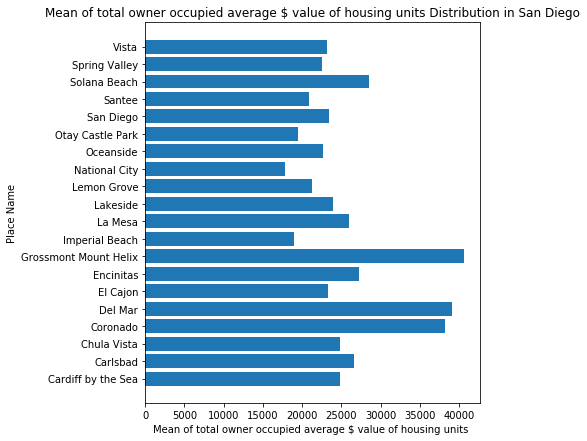

In [15]:
sd_mean_prices = df.groupby('Place Name')[' Total owner occupied average $ value of housing units '].mean()
fig,ax=plt.subplots(figsize = (6,7))
ax.barh(list(df.groupby('Place Name').groups.keys()), list(sd_mean_prices))
ax.set_xlabel('Mean of total owner occupied average $ value of housing units ')
ax.set_ylabel('Place Name')
ax.set_title('Mean of total owner occupied average $ value of housing units Distribution in San Diego')

In [16]:
sd_mean_prices.sort_values(ascending = False)

Place Name
Grossmont Mount Helix    40636.714286
Del Mar                  39152.600000
Coronado                 38234.333333
Solana Beach             28472.200000
Encinitas                27272.400000
Carlsbad                 26664.666667
La Mesa                  25928.189189
Chula Vista              24851.262500
Cardiff by the Sea       24784.000000
Lakeside                 23943.000000
San Diego                23436.167254
El Cajon                 23321.652778
Vista                    23202.695652
Oceanside                22634.176471
Spring Valley            22564.954545
Lemon Grove              21313.111111
Santee                   20832.461538
Otay Castle Park         19503.800000
Imperial Beach           19007.263158
National City            17873.777778
Name:  Total owner occupied average $ value of housing units , dtype: float64

Grossmont Mount Helix has highest average housing price

In [17]:
df['Other Race (including Indian)'] = df['Indian persons'] + df['Other specified race persons'] + \
    df['Reported "other race" persons']
df = df.drop(axis = 1, columns = ['Indian persons','Other specified race persons', 'Reported "other race" persons'])

In [18]:
male = df.groupby('Place Name')['Total Males'].mean()
female = df.groupby('Place Name')['Total Females'].mean()
white = df.groupby('Place Name')['White persons'].mean()
black = df.groupby('Place Name')['Black persons'].mean()
other_race = df.groupby('Place Name')['Other Race (including Indian)'].mean()

In [19]:
male_per = male/(male+female)
female_per = female/(male+female)

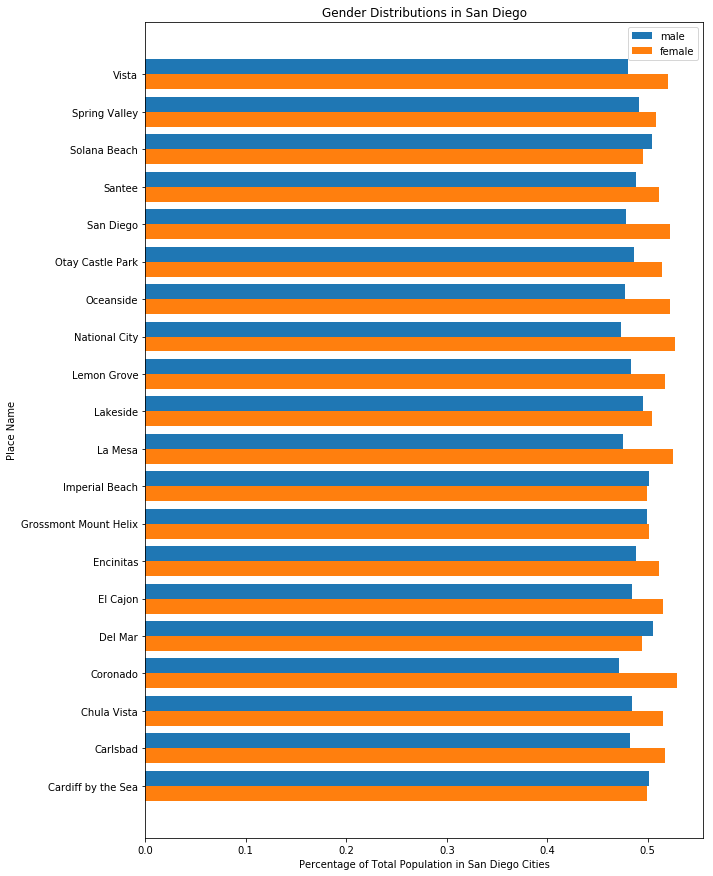

In [20]:
fig,ax=plt.subplots(figsize = (10, 15))
ax.barh(list(df.groupby('Place Name').groups.keys()), list(male_per), height = 0.4, align = 'edge')
ax.barh(list(df.groupby('Place Name').groups.keys()), list(female_per), height = -0.4, align = 'edge')
ax.set_xlabel('Percentage of Total Population in San Diego Cities')
ax.set_ylabel('Place Name')
ax.set_title('Gender Distributions in San Diego')
ax.legend(['male', 'female'],loc = 'upper right')

In [21]:
white_per = white/(white + black + other_race)
black_per = black/ (white + black + other_race)
other_race_per = other_race/(white + black + other_race)

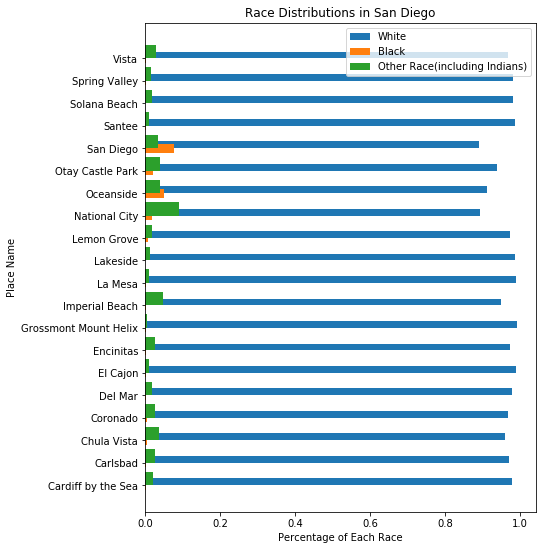

In [22]:
fig,ax=plt.subplots(figsize = (7, 9))
ax.barh(list(df.groupby('Place Name').groups.keys()), list(white_per), height = 0.3, align = 'edge')
ax.barh(list(df.groupby('Place Name').groups.keys()), list(black_per), height = 0.4, align = 'center')
ax.barh(list(df.groupby('Place Name').groups.keys()), list(other_race_per), height = 0.6, align = 'edge')
ax.set_xlabel('Percentage of Each Race')
ax.set_ylabel('Place Name')
ax.set_title('Race Distributions in San Diego')
ax.legend(['White', 'Black', 'Other Race(including Indians)'],loc = 'upper right')

Part 3

In [23]:
male_female_diff = np.array(df.loc[:, ['Total Males']]) - np.array(df.loc[:, ['Total Females']])                
owner_avg_price = np.array(df.loc[:, [' Total owner occupied average $ value of housing units ']])
male_female_diff

array([[-91],
       [-83],
       [-34],
       ...,
       [  0],
       [  2],
       [  0]], dtype=int64)

# Linear Regression
1. used to explain the relationship between two or more variables
2. use correlation coefficent R^2 to determine strength of correlation
3. Values range from -1 to 1
4. -1 <= R^2 < 0 means negatively correlated: when one variable increases, the other variable decreases
5. 0 < R^2 <= 1 means positively correlated: when one variable increases, the other variable also increases
6. R^2 = 0: no correlation

R^2 score:  0.0002907504472029476


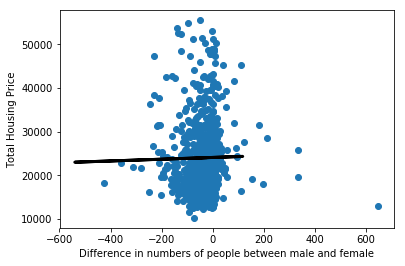

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(male_female_diff, owner_avg_price, test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(x_train, y_train)
#Predict
predicted = reg.predict(x_test)
#R^2
print('R^2 score: ', reg.score(x_train, y_train))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.xlabel('Difference in numbers of people between male and female')
plt.ylabel('Total Housing Price')
plt.show()



In [390]:
white_black_diff = np.array(df.loc[:, ['White persons']]) - np.array(df.loc[:, ['Black persons']])
white_black_diff

array([[883],
       [671],
       [529],
       ...,
       [557],
       [ 28],
       [108]], dtype=int64)

R^2 score:  0.02310321700206064


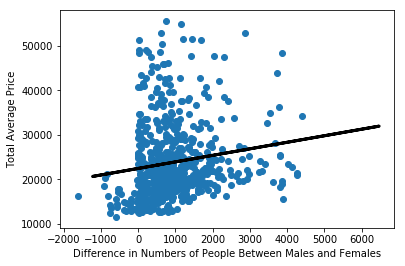

In [391]:
x_train, x_test, y_train, y_test = train_test_split(white_black_diff, owner_avg_price,test_size = 0.4)
reg = LinearRegression()
#Fit
reg.fit(x_train,y_train)
#Predict
predicted = reg.predict(x_test)
#R^2
print('R^2 score: ', reg.score(x_train,y_train))
# Plot regression line and scatter
plt.plot(x_test, predicted, color='black', linewidth=3)
plt.scatter(x=x_train,y=y_train)
plt.xlabel('Difference in Numbers of People Between Males and Females')
plt.ylabel('Total Average Price')
plt.show()

C:\Users\panyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\panyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\panyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

R^2 score:  0.03936450791414181


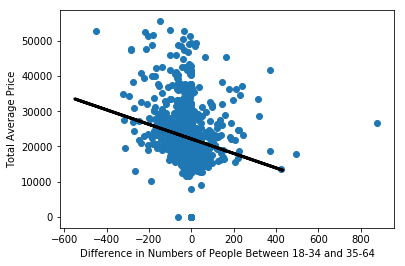

In [392]:
df1 = pd.read_csv('./SD1970_housing.csv')
df2=pd.read_csv('./SD1970_population.csv')

df2 = df2.replace('...',np.NaN)
df2=df2.interpolate()
df2=df2.dropna(axis=0,thresh=5)
df2=df2[['Male persons age 18 years',
 'Male persons age 19 years',
 'Male persons age 20 years',
 'Male persons age 21 years',
 'Male persons age 22-24 years',
 'Male persons age 25-34 years',
 'Male persons age 35-44 years',
 'Male persons age 45-54 years',
 'Male persons age 55-59 years',
 'Male persons age 60-61 years',
 'Male persons age 62-64 years']].apply(turnint)

df2['Males 18 to 34']=df2[['Male persons age 18 years',
 'Male persons age 19 years',
 'Male persons age 20 years',
 'Male persons age 21 years',
 'Male persons age 22-24 years',
 'Male persons age 25-34 years']].dropna().sum(axis=1)

df2['Males 35 to 64']=df2[['Male persons age 35-44 years',
 'Male persons age 45-54 years',
 'Male persons age 55-59 years',
 'Male persons age 60-61 years',
 'Male persons age 62-64 years']].dropna().sum(axis=1)

df3 = df2[['Males 18 to 34','Males 35 to 64']]
df3['Total Avg Price'] = df1[' Total owner occupied average $ value of housing units ']
df3['Total Avg Price'] = df3['Total Avg Price'].replace(' $-   ','$0.00')
df3['Total Avg Price'] = df3['Total Avg Price'].replace(' ... ',np.NaN)
df3 = df3.interpolate()
df3['Total Avg Price'] = df3['Total Avg Price'].apply(stripmoney)
df3=df3.interpolate()
f = np.array(df3.loc[:,['Males 18 to 34']])
g = np.array(df3.loc[:,['Males 35 to 64']])

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f-g, df3['Total Avg Price'],test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(x_train,y_train)
#Predict
predicted = reg.predict(x_test)
#R^2
print('R^2 score: ', reg.score(x_train,y_train))
# Plot regression line and scatter
plt.plot(x_test, predicted, color='black', linewidth=3)
plt.scatter(x=x_train,y=y_train)
plt.xlabel('Difference in Numbers of People Between 18-34 and 35-64')
plt.ylabel('Total Average Price')
plt.show()

In [393]:
df2 = pd.read_csv('SD1970_housing.csv')
df3 = df2.loc[:, [
 'Owner occupied housing units 1.01-1.50 persons per room',
 'Owner occupied housing units 1.51 or more persons per room',
 'Owner occupied housing units with all plumbing facilities and 1.01 or more persons per room',]]


In [394]:
df3 = df3.replace('...', np.NaN)
df3 = df3.dropna(axis = 0)
df3['Owner occupied housing units 1.01-1.50 persons per room'] = \
df3['Owner occupied housing units 1.01-1.50 persons per room'].apply(turnint)
df3['Owner occupied housing units 1.51 or more persons per room'] = \
df3['Owner occupied housing units 1.51 or more persons per room'].apply(turnint)
df3['Owner occupied housing units with all plumbing facilities and 1.01 or more persons per room'] = \
df3['Owner occupied housing units with all plumbing facilities and 1.01 or more persons per room'].apply(turnint)

Prediction: [2 7 3 ... 3 7 4]
Prediction: [14 18  8  3  4  0 17  3 10 72  4 49 14 10  6  0 26  2  9 59  4  0  5  4
  1 52  5 29  5 65  5 12 20  0  2 13 14  6  5  0  3 13  3 13  0  3 16  2
 49 21 72  2 17 40  7 14 28 49 25 12  3  1 49  0 21  0 16 39  2 16 14  1
  0  9 17  1  0  1 18  1  2  0  8  1 15  2 20 15 11 81  6  4 23 21 79 22
  1 27 41 17 12  1 19 39  1 28  0  0 40  3 37  7 15  0  8 10  0 79 13  3
  0  3  2 31  8 13  2  3 11 90 10 27  2  0  7  2 69 10  2 45  4  2 22  0
  7  0  4  4  0  4  5 10  7  7  7 32  2 24  4 12  3 19  3  6  7  6  0  0
  8 68  3 10 19 11 30 22  1 13 36  8  6 18  4  3  5 10 38  7 13  5  4  7
 14  5  0  0 13 12  0  2 10  5  3  5  1 26 11 37 33 10 28  1  3 83 12  2
  3 11 10  8 11  1  8  0  8  0 20  2  0  1 11 15  5 53  0  5 37  5  3  1
  0 30  0 17 10  9  6 10  2 10 14 10  0 40  5 10  2 28  3 31  0  2  1  3
  0  4 52 21  5  3 18  2  2 11  3  7 13  2  0  7  1  1  7 19 24  9  9 16
 24  0  9  1  6  3 38 57 11  0  6  3  0  2 12  1  8  6  4  9  8  5 10]
With KNN (K

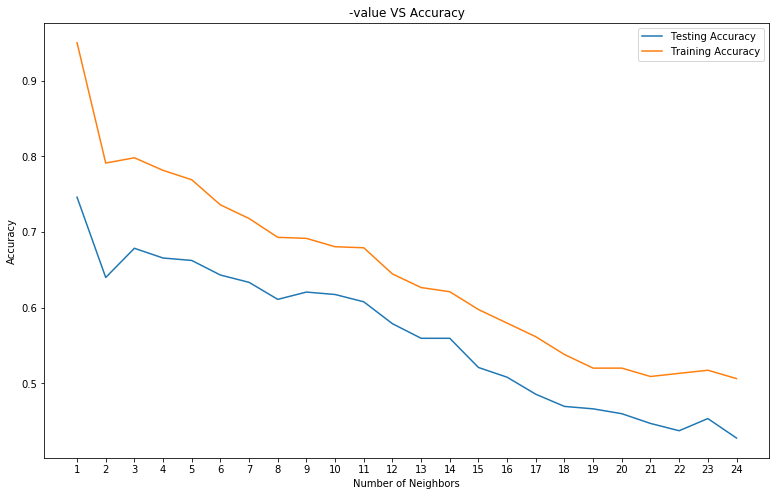

Best accuracy is 0.7459807073954984 with K = 1


In [404]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df3.loc[:,df3.columns != 'Owner occupied housing units with all plumbing facilities and 1.01 or more persons per room'], df3.loc[:,\
                                'Owner occupied housing units with all plumbing facilities and 1.01 or more persons per room']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for k in neig:
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))